# One Layer Neural Network
 reference:
 
 [Ch. 3 - Training process and the learning rate'](http://nbviewer.jupyter.org/github/JannesKlaas/MLiFC/blob/master/Week%201/Ch.%203%20-%20Training%20process%20and%20the%20learning%20rate.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import matplotlib

np.random.seed(0)
%matplotlib inline

In [2]:
class LogisticRegressor:
    model = {}
    cache = {}
    gradients = {}

    def __init__(self, input_dim = 0, learning_rate = 0.1):
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.init_parameters()

    def init_parameters(self):
        W1 = 2 * np.random.random((self.input_dim, 1)) - 1
        b1 = 0
        self.model = {'W1':W1, 'b1':b1}
        return

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def log_loss(self,y,y_hat):
        m = y.shape[0]
        l = -1 / m * np.sum(y * np.log(y_hat) + (1-y) * np.log((1-y_hat)))
        return l

    def log_loss_derivative(self,y,y_hat):
        return (y_hat-y)

    def forward_propagation(self,A0):
        W1, b1 = self.model['W1'],self.model['b1']
        z1 = A0.dot(W1) + b1
        A1 = self.sigmoid(z1)
        self.cache = {'A0':X,'z1':z1,'A1':A1}
        return
    
    def backward_propagation(self,y):
        A0, z1, A1 = self.cache['A0'],self.cache['z1'], self.cache['A1']
        W1, b1 = self.model['W1'], self.model['b1']
        m = A0.shape[0]
        dz1 = self.log_loss_derivative(y=y,y_hat=A1)
        dW1 = 1 / m * (A0.T).dot(dz1)
        db1 = 1 / m * np.sum(dz1, axis=0, keepdims=True)
        self.grads = {'dW1':dW1,'db1':db1}
        return

    def update_parameters(self):
        W1, b1 = self.model['W1'],self.model['b1']
        dW1, db1 = self.grads['dW1'], self.grads['db1']
        W1 -= self.learning_rate * dW1
        b1 -= self.learning_rate * db1
        self.model = {'W1':W1,'b1':b1}
        return

    def predict(self,X):
        self.forward_propagation(X)
        regressor_output = self.cache['A1']
        regressor_output[regressor_output >= 0.5] = 1
        regressor_output[regressor_output < 0.5] = 0
        return regressor_output

    def train(self,X,y, epochs):
        losses = []
        for i in range(epochs):
            self.forward_propagation(X)
            loss = self.log_loss(y,self.cache['A1'])
            losses.append(loss)
            if (i % 100 == 0):
                print('Epoch:',i,' Loss:', loss)
            self.backward_propagation(y)
            self.update_parameters()
        return losses

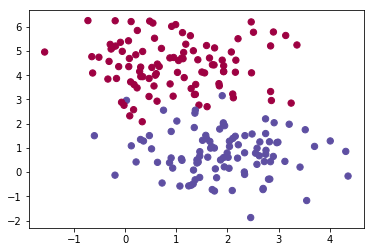

In [3]:
X, y = sklearn.datasets.make_blobs(n_samples=200,centers=2)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

In [4]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)

Epoch: 0  Loss: 1.1472166390285021
Epoch: 100  Loss: 0.06754570738506704
Epoch: 200  Loss: 0.06753631115542523
Epoch: 300  Loss: 0.06753307424281237
Epoch: 400  Loss: 0.06753197627021038
Epoch: 500  Loss: 0.06753160763100029
Epoch: 600  Loss: 0.06753148460295816
Epoch: 700  Loss: 0.06753144368719413
Epoch: 800  Loss: 0.06753143010719717
Epoch: 900  Loss: 0.06753142560523308


/home/hsiehpinghan/anaconda3/envs/machine-learning-example/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/home/hsiehpinghan/anaconda3/envs/machine-learning-example/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


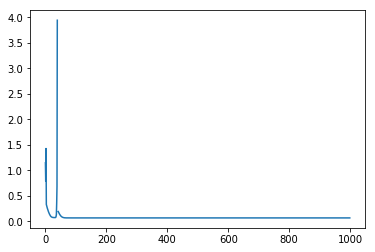

In [5]:
regressor = LogisticRegressor(input_dim=2,learning_rate=10)
losses = regressor.train(X,y,epochs=1000)
plt.plot(losses)

Text(0.5,1,'Decision Boundary for logistic regressor')

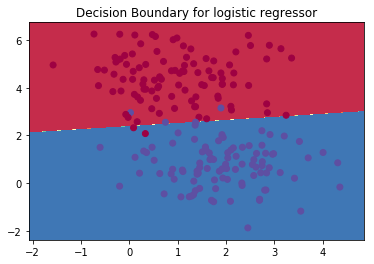

In [6]:
plot_decision_boundary(lambda x: regressor.predict(x))
plt.title("Decision Boundary for logistic regressor")

The loss first went _up_ quite significantly before then coming down. At multiple instances it moves up again. This is a clear sign that the learning rate is too large, let's try a lower one

Epoch: 0  Loss: 1.0516351373290993
Epoch: 100  Loss: 0.2398623343363979
Epoch: 200  Loss: 0.1903287358239751
Epoch: 300  Loss: 0.17156420431942557
Epoch: 400  Loss: 0.16062432810473237
Epoch: 500  Loss: 0.152895977243601
Epoch: 600  Loss: 0.14684622474749362
Epoch: 700  Loss: 0.14182025211995233
Epoch: 800  Loss: 0.1374900685670643
Epoch: 900  Loss: 0.1336714254131254


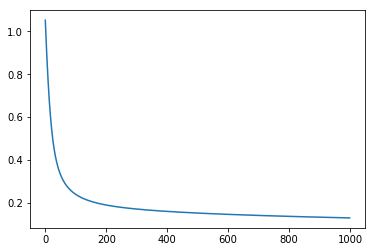

In [7]:
regressor = LogisticRegressor(input_dim=2,learning_rate=0.05)
losses = regressor.train(X,y,epochs=1000)
plt.plot(losses)

Text(0.5,1,'Decision Boundary for logistic regressor')

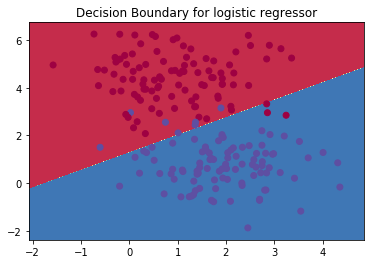

In [8]:
plot_decision_boundary(lambda x: regressor.predict(x))
plt.title("Decision Boundary for logistic regressor")

This looks a bit smoother already, and you can see that the error is nearly ten times lower in the end. Let's try an even lower learning rate to see where we can take this.

Epoch: 0  Loss: 0.5779926337482691
Epoch: 100  Loss: 0.5200682649887528
Epoch: 200  Loss: 0.474686677310338
Epoch: 300  Loss: 0.439048736272446
Epoch: 400  Loss: 0.41091528391232546
Epoch: 500  Loss: 0.38854562024973477
Epoch: 600  Loss: 0.37060760163205464
Epoch: 700  Loss: 0.3560893829682833
Epoch: 800  Loss: 0.34422410610811605
Epoch: 900  Loss: 0.3344298442433981


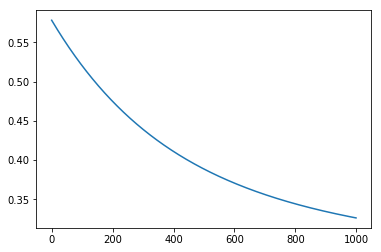

In [9]:
regressor = LogisticRegressor(input_dim=2,learning_rate=0.0005)
losses = regressor.train(X,y,epochs=1000)
plt.plot(losses)

Text(0.5,1,'Decision Boundary for logistic regressor')

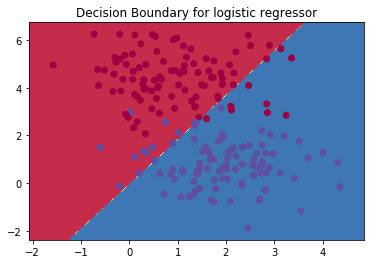

In [10]:
plot_decision_boundary(lambda x: regressor.predict(x))
plt.title("Decision Boundary for logistic regressor")

This is a very smooth gradient descent but also a very slow one. The error is more than twice as high as before in the end. If we would let this run for a few more epochs we probably could achieve a very good model but at a very large computing expense.

# How to find a good value for the learning rate
A good learning rate converges fast and leads to low loss. But there is no silver bullet perfect learning rate that always works. It usually depends on your project. It is as much art as it is science to tune the learning rate and only repeated experimentation can lead you to a good result. 

Experience shows however, that a good learning rate is usually around 0.1, even though it can well be different for other projects.

# Linear Only
As you can see, our logistic regressor seperates the two clouds with a simple line. This is appropriate for this case but might fail when the boundary is a more complex function. Let's try out a more complex function.

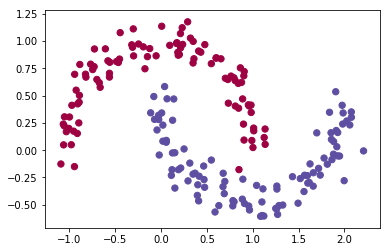

In [11]:
X, y = sklearn.datasets.make_moons(200, noise=0.1)
y = y.reshape(200,1)
plt.scatter(X[:,0], X[:,1], s=40, c=y.flatten(), cmap=plt.cm.Spectral)

Epoch: 0  Loss: 0.777684390543935


Text(0.5,1,'Decision Boundary for hidden layer size 3')

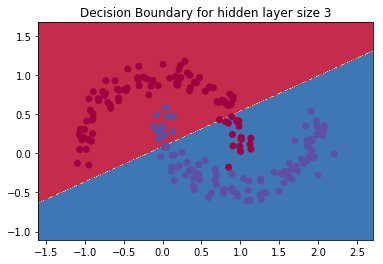

In [12]:
y = y.reshape(200,1)
regressor = LogisticRegressor(input_dim=2, learning_rate=0.05)
losses = regressor.train(X,y,epochs=100)
plot_decision_boundary(lambda x: regressor.predict(x))
plt.title("Decision Boundary for hidden layer size 3")